# Single-Output Regression Neural Network pada kasus Prediksi Kualitas Air

Notebook ini hanya __contoh__ dan dibuat untuk __pembelajaran__ mengenai _Deep Learning/Neural Networks_ dan penggunaan praktis bidang sumberdaya air menggunakan _Python_. Notebook ini masih perlu dievaluasi kembali jika digunakan untuk kepenting riset/penelitian ataupun proyek. 

## Informasi Notebook

- __notebook name__: `taruma_demo_ann_ka_2.0.0`
- __notebook version/date__: `2.0.0`/`20190713`
- __notebook server__: Google Colab
- __hidrokit version__: `0.2.0`
- __python version__: `3.7`


# Deskripsi Kasus

Bagian ini akan menjelaskan gambaran umum mengenai dataset, permasalahan/tujuan, dan langkah penyelesaiannya


## Dataset

Dataset merupakan data kualitas air __bulanan__ dari __Juni 2000 hingga Desember 2017__ (211 data bulanan). Dataset memiliki 15 kolom yaitu (berurutan):
- __1 kolom berupa tanggal__
- __11 kolom _independent variables_ yang diperoleh di stasiun A__:
    - temperatur udara (`temp_udara`), lama penyinaran (`lama_sinar`), kecepatan angin (`kec_angin`), $Q_{in}$ (`debit_masuk`), $Q_{out}$ (`debit_keluar`), volume (`volume`), temperatur air (`temp_air`), $O_2$, Oksigen (`oksigen`), $NO_2$, Nitrogen (`nitrogen`), $NO_3$, Nitrat (`nitrat`), $NH_3$, Amonia (`amonia`).
- __3 kolom _dependent variables_ pada stasiun B__:
    - $NO_2$, Nitrogen (`out_nitrogen`), $NO_3$, Nitrat (`out_nitrat`), $NH_3$, Amonia (`out_amonia`).

## Permasalahan dan Tujuan

__Permasalahan__: 
- Peneliti ingin mengetahui nilai tiga kualitas air berupa $NO_2, NO_3, NH_3$ pada stasiun B berdasarkan informasi yang diperoleh di stasiun A. 

__Batasan Masalah__: 
- Dalam _notebook_ ini _target_ yang digunakan hanya $NH_3$ (_single-output_). 
- Arsitektur _Neural Networks_ yang digunakan adalah _Multi Layer Perceptron_ (MLP), dengan setidaknya _hidden layers_ lebih dari satu.
- Kasus disini merupakan contoh permasalahan _supervised learning_.

__Pertanyaan__: 
- Berapa nilai NH3 pada stasiun B pada waktu $t$ jika __telah diketahui__ hasil pengukuran di stasiun A pada waktu $t$ __dan__ hasil observasi stasiun B pada waktu sebelumnya ($t-1, t-2, ..., t-n$, dengan $n$ adalah jumlah _timesteps_)?
- Apa arsitektur _NN_ yang optimal untuk melakukan prediksi kualitas air?

_Catatan_: Dalam kasus ini akan digunakan _$2$ timesteps_ yang berarti data __dua bulan yang lalu__ akan digunakan sebagai _input_ untuk memprediksikan _target_ pada waktu $t$.


## Strategi Penyelesaian Masalah

### Tahap 1: _Data exploration and Data munging_
1. _Import_ dataset dari berkas excel ke dalam `pandas.DataFrame`.
2. Eksplorasi dataset berupa memeriksa kehilangan data disertai validasi dan verifikasi data. _Data exploration_ dapat berupa visualisasi, deskripsi statistik, dan memeriksa jika terdapat nilai _outlier_ atau tidak.
3. Jika terdapat data yang hilang, maka __diasumsikan__ data memiliki sifat _linear_ sehingga data yang hilang diisi dengan menginterpolasikan dengan metode linear. (Langkah ini dapat diganti dengan kesesuaian keahlian bidangnya)
4. Diperiksa kembali data yang telah diisi dan melakukan ekplorasi data lagi untuk memastikan dataset sudah siap untuk diolah di tahap berikutnya.

### Tahap 2: _Data Preprocessing_
1. Membagi dataset menjadi dua bagian yaitu __training set dan test set__. Pemotongan data ini tidak acak. __Training set__ merupakan potongan data dari __Juni 2000 hingga Desember 2014__. __Test set__ merupakan potongan data dari __Januari 2015 hingga Desember 2017__. Untuk selanjutnya hanya __training set__ yang akan diproses untuk training dan __test set__ disimpan untuk tahap evaluasi model. 
2. Dilakukan tahap ___Scaling___ yaitu menormalisasikan nilai pada dataset ke dalam skala yang sama. Digunakan metode `MinMaxScaler` karena diketahui data tidak terdistribusi normal. 
3. Membuat kolom yang menunjukkan _$2$ timesteps_, sehingga dataset yang sebelumnya 14 kolom menjadi $feature_{original}\times(timesteps+1)=14\times(2+1)=42$. 
4. Menampilkan hasil penambahan _timesteps_ dalam bentuk `pandas.DataFrame`.
5. __training set__ dibagi menjadi `X_train` dan `y_train`. Dengan `X_train` merupakan seluruh kolom __kecuali__ nilai observasi dari stasiun B pada waktu $t$ (kolom: `out_nitrogen_tmin0, out_nitrat_tmin0, out_amonia_tmin0`) sebagai _feature_. Sedangkan `y_train` merupakan kolom `out_amonia_tmin0` sebagai _target_. 

### Tahap 3: _Building Neural Networks_
1. Untuk Neural Networks digunakan _Multi Layer Perceptron (MLP)_ dengan target _single-output_.
2. Membuat fungsi `build_model` yang memberikan fleksibilitas arsitektur sehingga memiliki hidden layer lebih dari satu dengan parameter `hidden_layers`.
3. Menggunakan `GridSearchCV` untuk mengetahui parameter terbaik.
4. Melalukan proses `fit` terhadap `X_train, y_train`. Besarnya _validation split_ yang digunakan sebesar $0.2$.
 
### Tahap 4: _Evaluation Models_
1. Pada tahap evaluasi, dataset yang digunakan adalah __test set__. _test set_ yang diperoleh dari pembagian set perlu diproses lebih lanjut sebelum digunakan untuk memprediksi.
2. Dilakukan proses _data preprocessing_ seperti tahap 2 langkah 2-5 pada __test set__.
3. Memprediksi nilai dengan model yang terbaik hasil _Grid Search_. 
4. Mengembalikan nilai prediksi dan nilai `y_test` ke skala original dengan menggunakan _method_ `inverse_transform`. Hal ini dilakukan dengan mentransfer atribut `MinMaxScaler` sebelumnya ke _object_ baru, agar menyederhanakan proses pengembalian ke skala asli.
5. Evaluasi menggunakan metrik RMSE/MAE.
6. Evaluasi menggunakan grafik.
7. Menghitung nilai beda prediksi dan observasi, dan dilakukan statistik deskriptif disertai membuat histogram nilai residu tersebut.

### Tahap 5: _Conclusion and Interpretation_
1. Tahap ini menyimpulkan hasil model dan menginterpretasikan model NN.
2. Langkah yang bisa meningkatkan hasil model dengan mengurangi kemungkinan _overfitting_ ataupun _underfitting_.


# Tahap 0: Pengaturan Awal

Bagian ini merupakan pengaturan awal pribadi, dapat diabaikan.

In [1]:
from datetime import datetime

#### PROJECT DESCRIPTION
notebook_version = '2.0.0'
notebook_title = 'kualitas_air_ann_so' + '_' + notebook_version
prefix = datetime.utcnow().strftime("%Y%m%d_%H%M")
project_title = prefix + '_' + notebook_title

print(f'Judul Notebook: {notebook_title}')
print(f'Judul Proyek: {project_title}')

Judul Notebook: kualitas_air_ann_so_2.0.0
Judul Proyek: 20190713_0507_kualitas_air_ann_so_2.0.0


In [0]:
#### Memasang Akses Google Drive (untuk tempat menyimpan hasil training)
from google.colab import drive
drive.mount('/content/gdrive')
drop_path = '/content/gdrive/My Drive/Colab Notebooks/_dropbox'

In [3]:
#### Instalasi Paket Python Pribadi (untuk Logging)
#### https://github.com/taruma/umakit
!pip install umakit
from umakit.logtool import LogTool
mylog = LogTool()
mylog._reset()

#### Instalasi Paket Hidrokit (untuk plotting, dan transformasi kolom saat data preprocessing)
#### https://github.com/taruma/hidrokit
!pip install hidrokit

# Tahap 1: _Data Exploration and Data Munging_

Ringkasan pada tahap ini:

1. _Import_ dataset.
2. Eksplorasi dataset.
3. Mengisi data yang hilang.
4. Eksplorasi dataset kembali.

## 1.1 Import dataset

In [4]:
#### Mengunggah dataset
from google.colab import files
uploaded = files.upload()

Saving data_ka.xlsx to data_ka.xlsx


In [5]:
#### 1. Import dataset ke pandas.DataFrame
import pandas as pd

## import dataset
dataset = pd.read_excel('data_ka.xlsx', skiprows=[0])

## Menamai kolom
dataset.columns = ["date", "temp_udara", "lama_sinar", "kec_angin", 
                   "debit_masuk", "debit_keluar", "volume", "temp_air", 
                   "oksigen", "nitrogen", "nitrat", "amonia", 
                   "out_nitrogen", "out_nitrat", "out_amonia"]

## Mengatur index dataframe ke tanggal
dataset = dataset.set_index('date')

dataset.head(5)

temp_udara  lama_sinar  ...  out_nitrat  out_amonia
date                                ...                        
2000-06-20        26.5    6.050000  ...    0.524643    0.589523
2000-07-20        25.2    4.366667  ...    0.727771    0.602750
2000-08-20        26.9    7.616667  ...    0.742150    0.627844
2000-09-20        26.4    5.100000  ...    0.457229    0.430150
2000-10-20        25.2    6.233333  ...    0.461479    0.559891

[5 rows x 14 columns]

## 1.2 Eksplorasi dataset

In [6]:
## Gamabaran umum dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 211 entries, 2000-06-20 to 2017-12-13
Data columns (total 14 columns):
temp_udara      210 non-null float64
lama_sinar      210 non-null float64
kec_angin       210 non-null float64
debit_masuk     210 non-null float64
debit_keluar    210 non-null float64
volume          210 non-null float64
temp_air        209 non-null float64
oksigen         210 non-null float64
nitrogen        189 non-null float64
nitrat          208 non-null float64
amonia          210 non-null float64
out_nitrogen    210 non-null float64
out_nitrat      208 non-null float64
out_amonia      210 non-null float64
dtypes: float64(14)
memory usage: 24.7 KB


Dari dataset dapat disimpulkan:
1. Kolom `date` digunakan sebagai acuan total jumlah data yang tersedia. Diketahui bahwa ada __211 data__.
2. Kolom `temp_udara`, `lama_sinar`, `kec_angin`, `debit_masuk`, `debit_keluar`, `volume`, `temp_air`, `amonia`, `out_nitrogen`, `out_amonia` __kehilangan 1 data, sehingga jumlah datanya hanya 210__.
3. Kolom berikut memiliki kehilangan data lebih dari 1 data:
    - `temp_air`: total: 209 data, __kehilangan 2 data__.
    - `nitrogen`: total: 189 data, __kehilangan 22 data__.
    - `nitrat`: total: 208 data, __kehilangan 3 data__.
    - `out_nitrat`: total: 208 data, __kehilangan 3 data__.

### Visualisasi

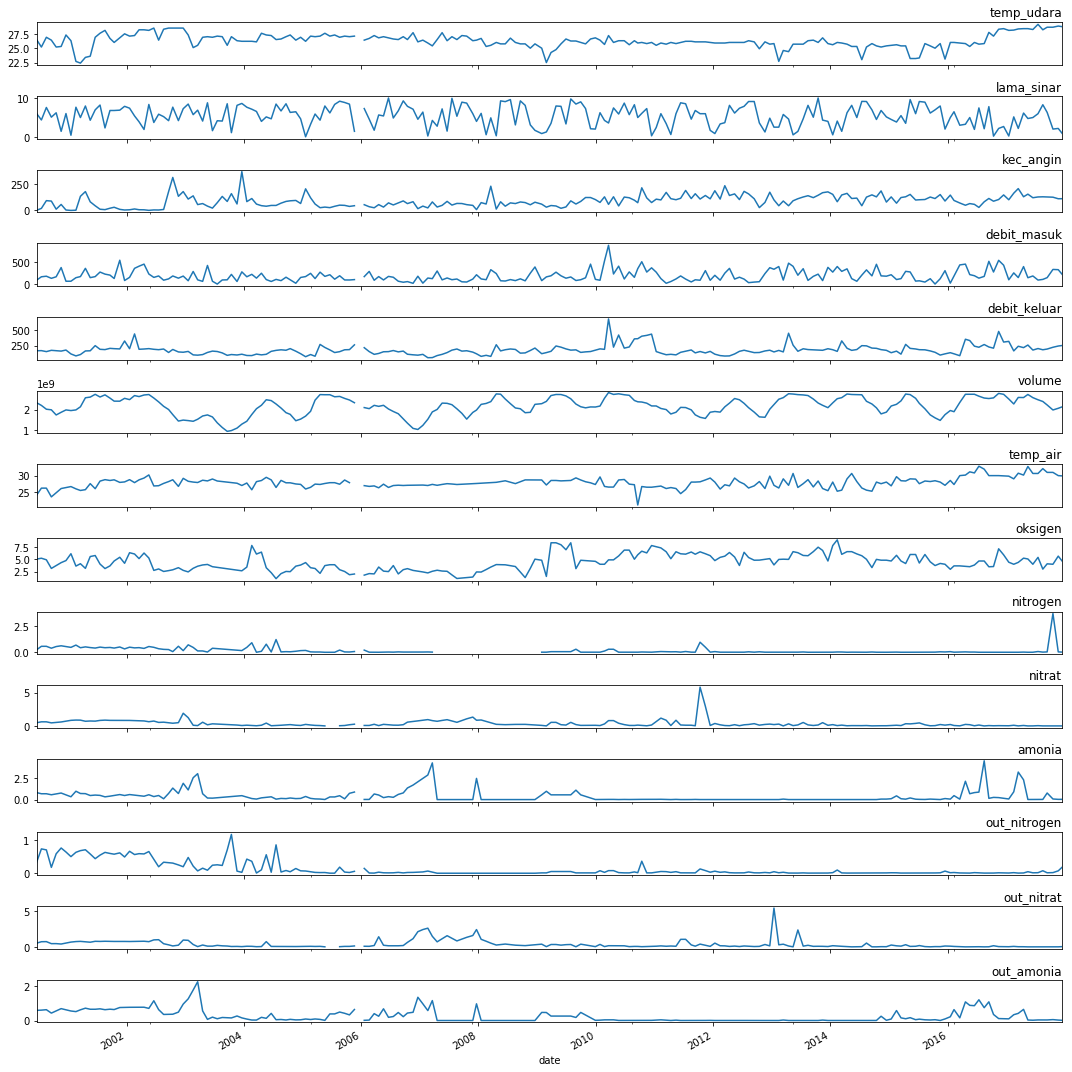

In [7]:
from hidrokit.viz import graph
graph.subplots(dataset, ncols=1, nrows=14, figsize=(15, 15));

Dari grafik diatas terlihat ada data yang hilang.

## 1.3 Kehilangan Data

In [8]:
## Memperoleh informasi kehilangan data
from hidrokit.prep import read

data_hilang = read.missing_row(dataset, date_format='%Y/%m')

print("Daftar kehilangan data:")
for column, value in data_hilang.items():
    print(
        "Kolom {}: {}".format(column, value)
    )

Daftar kehilangan data:
Kolom temp_udara: ['2005/12']
Kolom lama_sinar: ['2005/12']
Kolom kec_angin: ['2005/12']
Kolom debit_masuk: ['2005/12']
Kolom debit_keluar: ['2005/12']
Kolom volume: ['2005/12']
Kolom temp_air: ['2005/11', '2005/12']
Kolom oksigen: ['2005/12']
Kolom nitrogen: ['2005/12', '2007/04', '2007/05', '2007/06', '2007/07', '2007/08', '2007/09', '2007/10', '2007/11', '2007/12', '2008/01', '2008/02', '2008/03', '2008/04', '2008/05', '2008/06', '2008/07', '2008/08', '2008/09', '2008/10', '2008/11', '2008/12']
Kolom nitrat: ['2005/06', '2005/07', '2005/12']
Kolom amonia: ['2005/12']
Kolom out_nitrogen: ['2005/12']
Kolom out_nitrat: ['2005/06', '2005/07', '2005/12']
Kolom out_amonia: ['2005/12']




Dari proses diatas diperoleh informasi:
1. Pada bulan `2005/12` (Desember 2005), data tidak tersedia pada __seluruh kolom__.
2. Kolom `temp_air`, kehilangan data pada `2005/11` (November 2005).
3. Kolom `nitrogen`, kehilangan data pada dari `2007/04` (April 2007) sampai `2008/12` (Desember 2008).
4. Kolom `nitrat` dan `out_amonia`, kehilangan data pada `2005/06` (Juni 2005) dan `2005/07` (Juli 2005).`

### Mengisi Kehilangan data

__Diasumsikan__ bahwa data yang hilang dapat diisi dengan __metode interpolasi linear__. Dengan catatan metode tersebut digunakan dalam notebook ini untuk __pembelajaran__. Dimungkinkan untuk mengisi data hilang dengan teknik yang tersedia dalam bidang keahliannya. 

In [0]:
## Mengisi Data yang hilang dengan metode linear
new_dataset = dataset.interpolate(method='linear')

## 1.4 Eksplorasi dataset

In [10]:
# statistik deskriptif
new_dataset.describe()

temp_udara  lama_sinar   kec_angin  ...  out_nitrogen  out_nitrat  out_amonia
count  211.000000  211.000000  211.000000  ...    211.000000  211.000000  211.000000
mean    26.297867    5.429739   89.090929  ...      0.124222    0.369451    0.258836
std      1.230595    2.653354   56.941944  ...      0.216860    0.591848    0.360054
min     22.400000    0.000000    0.400000  ...      0.000000    0.004667    0.000000
25%     25.750000    3.591667   47.350000  ...      0.006673    0.052589    0.002378
50%     26.200000    5.750000   83.300000  ...      0.019494    0.143512    0.066165
75%     27.000000    7.683333  125.400000  ...      0.085891    0.452636    0.448939
max     29.150000   10.083333  365.900000  ...      1.164635    5.460060    2.252332

[8 rows x 14 columns]

### Visualisasi

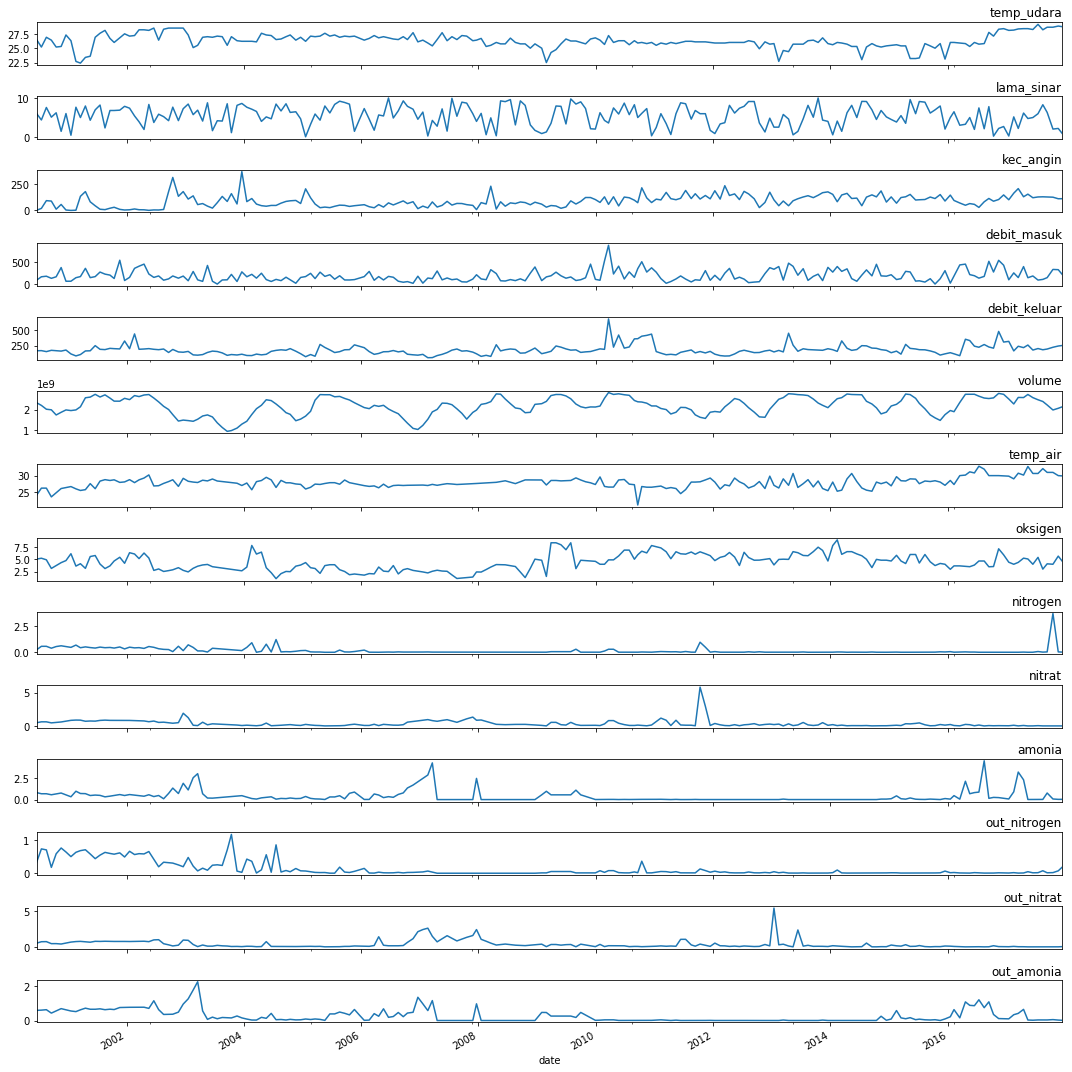

In [11]:
graph.subplots(new_dataset, ncols=1, nrows=14, figsize=(15, 15));

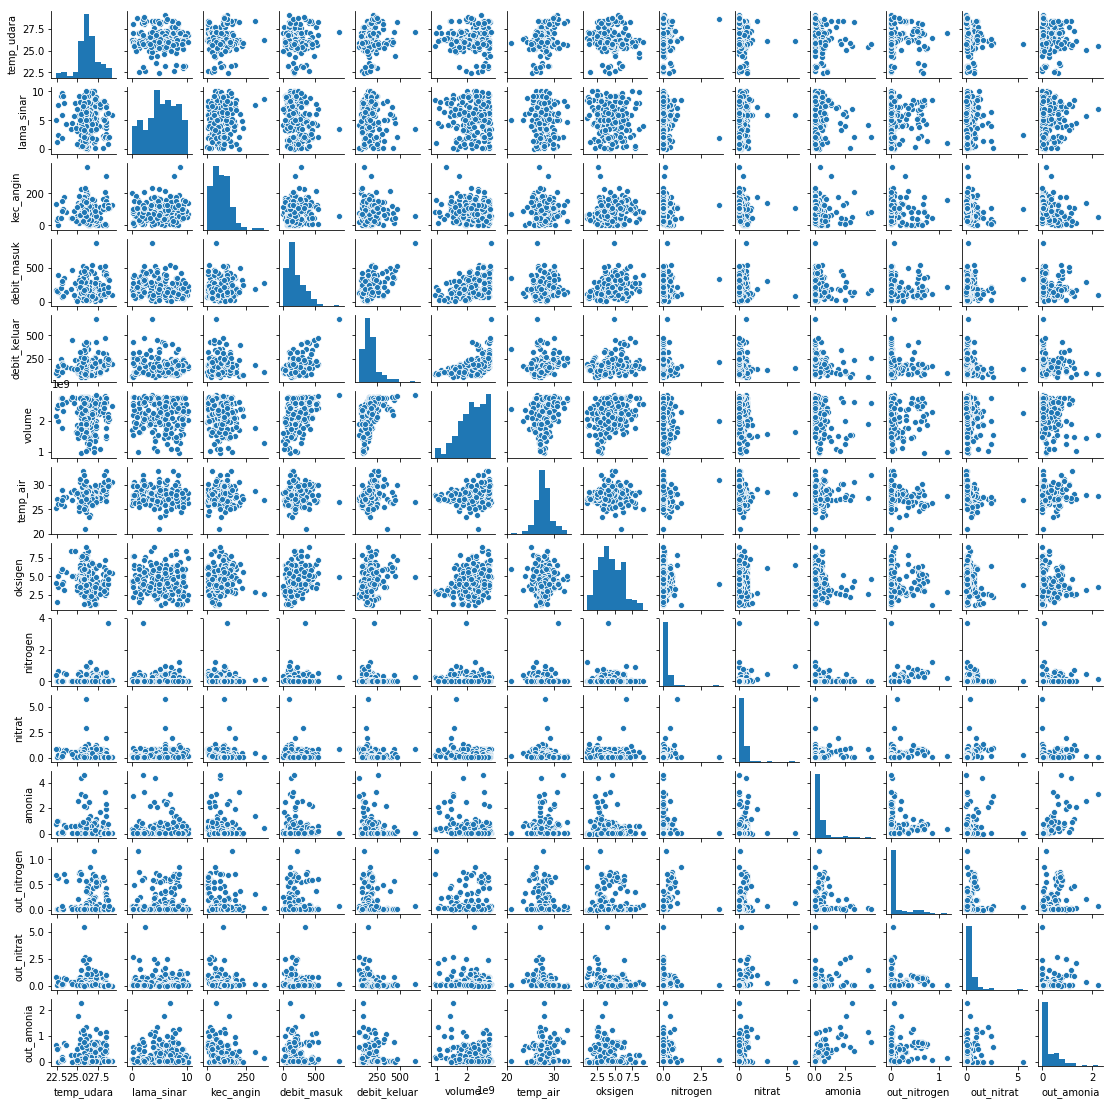

In [12]:
## Pairplot untuk melihat hubungan masing-masing kolom
import seaborn as sns

g = sns.pairplot(new_dataset)
g.fig.set_size_inches(15,15)

Dari visualisasi diatas diketahui bahwa terdapat kolom yang memiliki distribusi tidak normal, sehingga dalam _scaling_ digunakan `MinMaxScaler`.

# Tahap 2: _Data Preprocessing_

1. Membagi dataset menjadi _training set_ dan _test set_. 
2. _Scaling_ dengan `MinMaxScaler`.
3. Menambahkan kolom _timesteps_. 
4. Menampilkan hasil penambahan _timesteps_.
5. Mempersiapkan data _training_ dari _training set_ menjadi `X_train` dan `y_train`.

In [0]:
#### Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 2.1 _Training set_ dan _Test set_

Dari `new_dataset` yang telah diinterpolasi, akan dibagi menjadi dua bagian data yaitu training dan testing. 

- Training data merupakan data dari `2000/06` hingga `2014/12`
- Testing data merupakan data dari `2015/01` hingga `2017/12`

In [14]:
## Memisahkan dataset training dan test

training_dataset = new_dataset.loc[:"20141231", :]
test_dataset = new_dataset.loc["20150101":, :]

## Informasi training set dan testing set
print("Informasi training set: {} baris, {} kolom".format(
    training_dataset.shape[0], training_dataset.shape[1])
     )
print("Informasi testing set: {} baris, {} kolom".format(
    test_dataset.shape[0], test_dataset.shape[1])
     )

## Menampilkan training set
training_dataset.head()

Informasi training set: 175 baris, 14 kolom
Informasi testing set: 36 baris, 14 kolom


temp_udara  lama_sinar  ...  out_nitrat  out_amonia
date                                ...                        
2000-06-20        26.5    6.050000  ...    0.524643    0.589523
2000-07-20        25.2    4.366667  ...    0.727771    0.602750
2000-08-20        26.9    7.616667  ...    0.742150    0.627844
2000-09-20        26.4    5.100000  ...    0.457229    0.430150
2000-10-20        25.2    6.233333  ...    0.461479    0.559891

[5 rows x 14 columns]

Menyimpan nilai dalam `dataframe` dalam bentuk `numpy.array`.

In [15]:
array_train = training_dataset.values
array_train[:1, :]

array([[2.65000000e+01, 6.05000000e+00, 1.40000000e+00, 9.13500000e+01,
        1.68320000e+02, 2.33428460e+09, 2.39375000e+01, 5.06250000e+00,
        2.35750000e-01, 4.81875000e-01, 8.25375000e-01, 3.26914583e-01,
        5.24642857e-01, 5.89522917e-01]])

## 2.2 _Scaling_

Skala yang digunakan adalah `MinMaxScaler`.

In [16]:
#### Scaling dataset
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
array_train = sc.fit_transform(array_train)
array_train[:1, :]

array([[0.67213115, 0.6       , 0.00273598, 0.09964254, 0.17944199,
        0.738755  , 0.31118314, 0.50451442, 0.19395311, 0.08149884,
        0.19043453, 0.28070132, 0.09466023, 0.26173895]])

## 2.3 Kolom _Timesteps_

Setelah _scaling_, dataset dibuat kolom tambahan yang merepresentasikan data _timesteps_ sebelumnya. Untuk kasus ini dipilih timesteps sebanyak 2 bulan sebelumnya. Sehingga persamaan umumnya berupa:

$Output_t = f(Input_t, Input_{t-1}, Input_{t-2}, Output_{t-1}, Output_{t-2})$

Diketahui terdapat 14 kolom (termasuk output) dengan _timesteps_ 2, sehingga dimensi `array` menjadi $14 \times (2+1)=42$.

__Catatan__: 
- Karena hidrokit menggunakan input dalam bentuk DataFrame, hasil _scaling_ yang masih berbentuk array dibuat DataFramenya. 
- Dapat digunakan langsung dengan input array dengan menggunakan _private function_ `_multi_column_timesteps()`



In [17]:
# Membuat dataframe baru setelah proses scaling
training_dataset_scale = pd.DataFrame(
    data=array_train,
    columns=training_dataset.columns,
    index=training_dataset.index
)

# Membuat tabel timesteps
from hidrokit.prep import timeseries

n_timesteps = 2
df_train_ts = timeseries.timestep_table(training_dataset_scale, timesteps=n_timesteps)
array_train_ts = df_train_ts.values

print("Dimensi array setelah diberi kolom timesteps: {}".format(array_train_ts.shape))

Dimensi array setelah diberi kolom timesteps: (173, 42)


## 2.4 Tabel _Training set_

Tabel `pandas.DataFrame` untuk _training set_ yang telah diberi kolom _timesteps_.

In [18]:
## Menampilkan hasil pemberian kolom timestep dengan pandas.DataFrame
df_train_ts.head()

temp_udara_tmin0  ...  out_amonia_tmin2
date                          ...                  
2000-08-20          0.737705  ...          0.261739
2000-09-20          0.655738  ...          0.267612
2000-10-20          0.459016  ...          0.278753
2000-11-20          0.475410  ...          0.190980
2000-12-20          0.803279  ...          0.248583

[5 rows x 42 columns]

## 2.5 `X_train` dan `y_train`

Berdasarkan persamaan sebelumnya, kolom _output_ pada waktu $t$ harus dipisahkan sebagai label _training_-nya. Dan karena dalam kasus ini fokus pada _single-output_, maka kolom _output_ yang digunakan sebagai _target_ hanya `out_amonia_tmin0`.

In [19]:
## Pembagian X_train dan y_train untuk 
## Kasus Single-Output Regression Neural Network

target_col = ["out_amonia_tmin0"]
drop_col = ["out_nitrogen_tmin0", "out_nitrat_tmin0", "out_amonia_tmin0"]
df_X_train = df_train_ts.drop(drop_col, axis=1)
df_y_train = df_train_ts[target_col]
X_train = df_X_train.values
y_train = df_y_train.values.flatten()
print(f"Dimensi X_train = {X_train.shape}")
print(f"Dimensi y_train = {y_train.shape}")

Dimensi X_train = (173, 39)
Dimensi y_train = (173,)


Catatan: Terdapat __39 _features___ dengan __1 _target___. 

# Tahap 3: _Building Neural Networks_

1. Fungsi `build_model`.
2. Penggunaan `GridSearchCV`.
3. Melalukan proses `fit` terhadap `X_train, y_train`

## 3.1 Fungsi `build_model`

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor

def build_model(optimizer='adam', activation='sigmoid', first_layer=10, 
                hidden_layers=[30], p=0, message=True):
    global idx
    model = Sequential()
    model.add(Dense(first_layer, activation=activation, input_dim=39))
    model.add(Dropout(p))
    
    if hidden_layers:
        for x in hidden_layers:
            model.add(Dense(x, activation=activation))
            if x == hidden_layers[-1]:
                model.add(Dropout(p/2))
            else:
                model.add(Dropout(p))
    
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error', 
                  metrics=['mse', 'mae'])
    
    if message and ('idx' in globals()):
        print(f"{idx}>", end="")
        idx -= 1
        if (idx % 10) == 0:
            print()
    
    return model

model = KerasRegressor(build_fn=build_model, verbose=0)

Using TensorFlow backend.


## 3.2 Parameter `GridSearchCV`

In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(epochs=[100, 150, 200],
                  batch_size=[5, 10, 20],
                  first_layer=[10, 20, 30],
                  hidden_layers=[[20], [30]],
                  activation=['sigmoid'],
                  optimizer=['adam'],
                 )

# Ignore K-Fold Cross Validation
cv = [(slice(None), slice(None))]
# cv = 3

grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid,
                           cv=cv,
                           return_train_score=True,
                           verbose=1,
                           scoring='neg_mean_squared_error',
                          )

## 3.3 `Fit`

### 3.3.1 `Fitting`

In [22]:
# idx
search_steps = 1
for key, val in param_grid.items():
    search_steps *= len(val)
idx = search_steps*cv if (type(cv) is int) else search_steps

# Fitting
print(mylog.add_savepoint("START FITTING", 'fit'))

grid_search = grid_search.fit(X_train, y_train, verbose=0, validation_split=0.2)

print(mylog.add_savepoint("END FITTING", 'fit'))
print(mylog.add_duration('fit'))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
W0713 05:12:41.348032 140582811764608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 05:12:41.400704 140582811764608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 05:12:41.409335 140582811764608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0713 05:12:41.464263 140582811764608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.t

[2019-07-13 05:12:41] START FITTING
Fitting 1 folds for each of 54 candidates, totalling 54 fits
54>

W0713 05:12:42.024242 140582811764608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0713 05:12:42.117183 140582811764608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



53>52>51>
50>49>48>47>46>45>44>43>42>41>
40>39>38>37>36>35>34>33>32>31>
30>29>28>27>26>25>24>23>22>21>
20>19>18>17>16>15>14>13>12>11>
10>9>8>7>6>5>4>3>2>1>


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  5.5min finished


0>[2019-07-13 05:18:28] END FITTING
0:5:46


In [0]:
# Menyimpan object keras di final_model
final_model = grid_search.best_estimator_.model

# Simpan hasil grid search pada dataframe
df_cv = pd.DataFrame(grid_search.cv_results_)

### 3.3.2 _Saving_

In [24]:
# Save Model in JSON
fmodel_json = final_model.to_json()
fmodel_j_path = drop_path + '/{}.json'.format(project_title)
with open(fmodel_j_path, 'w') as json_file:
    json_file.write(fmodel_json)
mylog.add(f'Model JSON disimpan di {fmodel_j_path}')
print('save: {}'.format(fmodel_j_path))

# Save Weights of model
fmodel_w_path = drop_path + '/{}_weights.h5'.format(project_title)
final_model.save_weights(fmodel_w_path)
mylog.add(f'Model Weights disimpan di {fmodel_w_path}')
print('save: {}'.format(fmodel_w_path))

# Simpan model dan grid_search object
save_model_path = drop_path + '/' + project_title + '.h5'
final_model.save(save_model_path)
mylog.add(f'Model disimpan di {save_model_path}')
print('save: {}'.format(save_model_path))

# Simpan hasil GridSearch
save_grid_path = drop_path + '/{}.csv'.format(project_title)
df_cv.to_csv(save_grid_path)
mylog.add(f'Tabel GridSearch disimpan di {save_grid_path}')
print('save: {}'.format(save_grid_path))

save: /content/gdrive/My Drive/Colab Notebooks/_dropbox/20190713_0507_kualitas_air_ann_so_2.0.0.json
save: /content/gdrive/My Drive/Colab Notebooks/_dropbox/20190713_0507_kualitas_air_ann_so_2.0.0_weights.h5
save: /content/gdrive/My Drive/Colab Notebooks/_dropbox/20190713_0507_kualitas_air_ann_so_2.0.0.h5
save: /content/gdrive/My Drive/Colab Notebooks/_dropbox/20190713_0507_kualitas_air_ann_so_2.0.0.csv


### 3.3.3 Loading (Jika sudah disimpan Model dan Hasil _grid search_)

In [0]:
# load_model_path = drop_path + '/20190512_2037_kualitas_air_ann_so.h5'
# load_cvgrid_path = drop_path + '/20190512_2037_kualitas_air_ann_so.csv'

# from keras.models import load_model
# final_model = load_model(load_model_path)

# df_cv = pd.read_csv(load_cvgrid_path, index_col=[0])
# df_cv.head()

# Tahap 4: _Evaluate Model_

1. _Data preprocessing_ pada _test set_.
2. Memprediksi nilai dengan model yang terbaik hasil _Grid Search_. 
3. Mengembalikan ke skala aslinya. 
4. Evaluasi Model pada _test set_.
5. Nilai beda prediksi dan observasi.

## 4.1 _Data preprocessing_ pada _test set_

In [26]:
## Menampilkan test dataset
test_dataset.head()

temp_udara  lama_sinar  ...  out_nitrat  out_amonia
date                                ...                        
2015-01-14        25.5    4.500000  ...    0.261190    0.088036
2015-02-16        25.6    3.833333  ...    0.152798    0.578571
2015-03-16        25.4    5.500000  ...    0.109405    0.153452
2015-04-14        25.4    3.500000  ...    0.308036    0.102560
2015-05-12        23.2    9.666667  ...    0.069940    0.165476

[5 rows x 14 columns]

In [27]:
## pandas.DataFrame ke numpy.array
array_test = test_dataset.values
array_test = sc.transform(array_test)

test_dataset_scale = pd.DataFrame(
    data=array_test,
    columns=test_dataset.columns,
    index=test_dataset.index
)

## timestep table
df_test = timeseries.timestep_table(test_dataset_scale, timesteps=n_timesteps)
array_test_ts = df_test.values
df_test.head()

temp_udara_tmin0  ...  out_amonia_tmin2
date                          ...                  
2015-03-16          0.491803  ...          0.039086
2015-04-14          0.491803  ...          0.256877
2015-05-12          0.131148  ...          0.068130
2015-06-15          0.131148  ...          0.045535
2015-07-08          0.147541  ...          0.073469

[5 rows x 42 columns]

In [28]:
## Pembagian X_test dan y_test untuk 
## Kasus Single-Output Regression Neural Network
## Meninjau output_amonia 

df_X_test = df_test.drop(drop_col, axis=1)
df_y_test = df_test[target_col]
X_test = df_X_test.values
y_test = df_y_test.values.flatten()
print(f"Dimensi X_test = {X_test.shape}")
print(f"Dimensi y_test = {y_test.shape}")

Dimensi X_test = (34, 39)
Dimensi y_test = (34,)


## 4.2 Prediksi model dari parameter terbaik hasil _Grid Search_

In [0]:
# Prediksi
predict = final_model.predict(X_test)
truth = y_test

digunakan istilah _predict_ sebagai nilai prediksi dari `final_model`, dan _truth_ sebagai nilai observasi di stasiun B.

## 4.3 Mengembalikan ke skala aslinya

In [0]:
# Transfer attribute from MinMax Scaler (specific for last column (output) only)

sc_test = MinMaxScaler()
sc_test.min_, sc_test.scale_, sc_test.data_min_, sc_test.data_max_ = sc.min_[-1], sc.scale_[-1], sc.data_min_[-1], sc.data_max_[-1]

# Mengembalikan ke skala original
predict_real = sc_test.inverse_transform(predict.reshape(-1,1))
truth_real = sc_test.inverse_transform(truth.reshape(-1,1))

Nilai `-1` menunjukkan posisi kolom `out_amonia` saat melakukan proses `fit` pada _object_ `sc` (`MinMaxScaler`). 

In [31]:
# Dalam bentuk pandas.DataFrame
diff_table = pd.DataFrame(dict(predict=predict_real.flatten(),
                               truth=truth_real.flatten(),
                              ))
diff_table['diff'] = (diff_table.predict - diff_table.truth).abs()
diff_table.T

0         1         2   ...        31        32        33
predict  0.134772  0.007490  0.126282  ...  0.125497  0.073648 -0.202659
truth    0.153452  0.102560  0.165476  ...  0.052371  0.025548  0.013155
diff     0.018681  0.095069  0.039195  ...  0.073126  0.048101  0.215814

[3 rows x 34 columns]

## 4.4 Evaluasi Model _test set_

### 4.4.1 Metrik

In [32]:
metrics_train = final_model.evaluate(X_train, y_train, verbose=0)
metrics_test = final_model.evaluate(X_test, y_test, verbose=0)

for i, metrics in enumerate(final_model.metrics_names):
    print(f"Metrics: {metrics}")
    print(f"Train: {metrics_train[i]:.5f}")
    print(f"Test: {metrics_test[i]:.5f}")
    print()

Metrics: loss
Train: 0.00403
Test: 0.02630

Metrics: mean_squared_error
Train: 0.00403
Test: 0.02630

Metrics: mean_absolute_error
Train: 0.04247
Test: 0.10324



Fungsi `loss` yang digunakan saat training adalah `mean_squared error`. Dari informasi diatas diketahui bahwa nilai _MSE_ dan _MAE_ pada saat _training_ hampir mendekati 0. Perlu dicatat bahwa nilai tersebut berdasarkan nilai yang telah ditransformasi dengan metode `MinMaxScaler`. 

In [33]:
## menghitung MSE dan MAE test set dengan skala original
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_real = mean_squared_error(truth_real, predict_real)
mae_real = mean_absolute_error(truth_real, predict_real)

print(f"MSE (Original Scale): {mse_real:.4f}")
print(f"MAE (Original Scale): {mae_real:.4f}")

MSE (Original Scale): 0.1334
MAE (Original Scale): 0.2325


### 4.4.2 Visualiasi

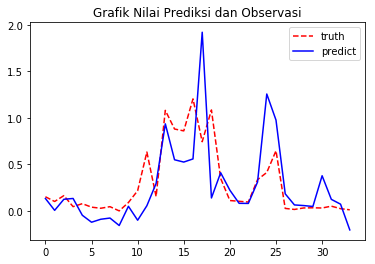

In [34]:
#### PLOT OUT_AMONIA PREDICTION AND TRUTH (OBSERVED VALUE)
plt.plot(truth_real, 'r--', label='truth')
plt.plot(predict_real, 'b', label='predict')
plt.title('Grafik Nilai Prediksi dan Observasi')
plt.legend()
plt.show()

Dari grafik diatas diketahui bahwa `final_model` mampu mengikuti fluktuasi data observasi.

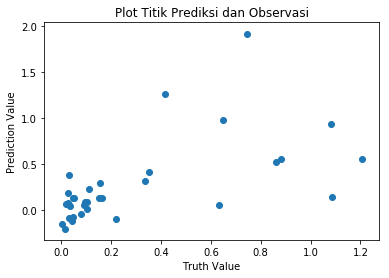

In [35]:
# PLOT TRUTH vs. PREDICT

plt.scatter(y=predict_real, x=truth_real)
plt.xlabel('Truth Value')
plt.ylabel('Prediction Value')
plt.title('Plot Titik Prediksi dan Observasi')
plt.show()

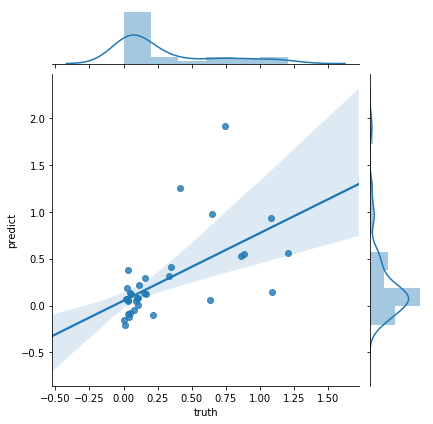

In [36]:
# Menggunakan seaborn

sns.jointplot(x='truth', y='predict', kind='reg', data=diff_table);

Dari dua grafik diatas terlihat bahwa terdapat hasil prediksi yang negatif meski pada kejadian nyata bahwa nilai negatif tidak mungkin untuk kualitas air.

## 4.5 Nilai beda prediksi dan observasi

### 4.5.1 Metrik

In [37]:
# statistik deskriptif nilai Beda (Residu)
diff_table['diff'].describe()

count    34.000000
mean      0.232529
std       0.285942
min       0.014104
25%       0.048180
50%       0.123307
75%       0.326472
max       1.175157
Name: diff, dtype: float64

### 4.5.2 Visualisasi

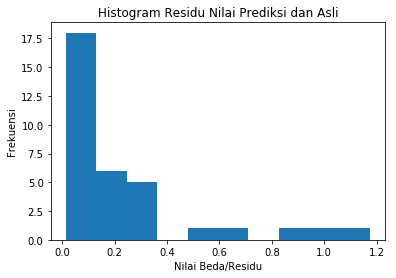

In [38]:
# plot histogram
diff = diff_table['diff'].values
plt.hist(diff)
plt.xlabel('Nilai Beda/Residu')
plt.ylabel('Frekuensi')
plt.title('Histogram Residu Nilai Prediksi dan Asli')
plt.show()

# Tahap 5: _Conclusion and Interpretation_

1. Interpretasi model ANN
2. Evaluasi hasil GridSearch
3. Ringkasan
4. Saran dan langkah selanjutnya

## 5.1 Interpretasi Model _Neural Networks_

In [39]:
# menghilangkan [] pada hidden layers di df_cv
df_cv['param_hidden_layers'] = df_cv['param_hidden_layers'].apply(lambda x: (str(x)[1:-1]) if str(x)[0] == '[' else x)

# memilih kolom yang akan digunakan untuk interpretasi
col_grid = ['param_activation', 'param_batch_size', 'param_epochs', 
            'param_first_layer', 'param_hidden_layers', 'param_optimizer',
            'mean_test_score', 'rank_test_score'
           ]
df_grid = df_cv[col_grid]
print(df_grid.shape)
df_grid.head()

(54, 8)


param_activation param_batch_size  ... mean_test_score rank_test_score
0          sigmoid                5  ...       -0.004687              22
1          sigmoid                5  ...       -0.005299              31
2          sigmoid                5  ...       -0.004517              17
3          sigmoid                5  ...       -0.004670              21
4          sigmoid                5  ...       -0.006117              37

[5 rows x 8 columns]

In [40]:
# mengurutkan berdasarkan mean_test_score / rank_test_score
df_grid_sorted = df_grid.sort_values('rank_test_score')
df_grid_sorted.head()

param_activation param_batch_size  ... mean_test_score rank_test_score
14          sigmoid                5  ...       -0.003704               1
16          sigmoid                5  ...       -0.003746               2
17          sigmoid                5  ...       -0.003886               3
13          sigmoid                5  ...       -0.003978               4
29          sigmoid               10  ...       -0.004032               5

[5 rows x 8 columns]

In [41]:
# hasil grid terburuk
df_grid_sorted.tail()

param_activation param_batch_size  ... mean_test_score rank_test_score
40          sigmoid               20  ...       -0.008445              50
42          sigmoid               20  ...       -0.009949              51
18          sigmoid               10  ...       -0.009951              52
36          sigmoid               20  ...       -0.010798              53
37          sigmoid               20  ...       -0.012189              54

[5 rows x 8 columns]

## 5.2 Evaluasi hasil `GridSearchCV`

In [42]:
# evaluasi 20 hasil terbaik
df_grid_top = df_grid_sorted.iloc[:20,:].copy()

# menghitung nilai unik tiap kolom
for col in df_grid_top.columns[:-2]:
    print(df_grid_top[col].value_counts())

sigmoid    20
Name: param_activation, dtype: int64
5     10
10     8
20     2
Name: param_batch_size, dtype: int64
200    10
150     7
100     3
Name: param_epochs, dtype: int64
30    9
10    6
20    5
Name: param_first_layer, dtype: int64
20    13
30     7
Name: param_hidden_layers, dtype: int64
adam    20
Name: param_optimizer, dtype: int64


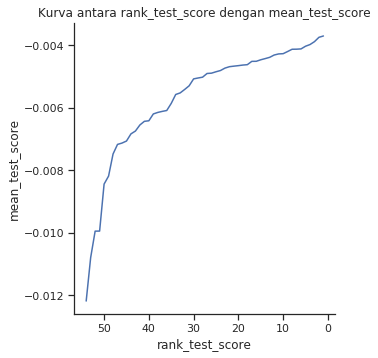

In [43]:
# Grafik antara rank_test_score dan mean_test_score
sns.set(style='ticks')
relplot = sns.relplot(x='rank_test_score', y='mean_test_score', data=df_grid, kind='line')
plt.gca().set_title("Kurva antara rank_test_score dengan mean_test_score")
plt.gca().invert_xaxis()

## 5.3 Ringkasan

1. Model terbaik diperoleh dengan parameter:
    - activation: `sigmoid`
    - batch_size: `5`
    - epochs: `200`
    - first_layer: `20`
    - hidden_layer: `20`
    - optimizer: `adam`
2. Dalam evaluasi model dengan _test set_ diperoleh informasi:
    - MSE dan MAE  sebesar $0.1334$ dan $0.2325$ (dalam skala original).
    - Nilai rata-rata nilai beda (`diff`) sebesar $0.232529$ (MAE), dengan standar deviasi sebesar $0.285942$.

## 5.4 Saran dan Langkah Selanjutnya

- Diketahui bahwa terdapat nilai negatif pada prediksi, sehingga untuk model selanjutnya lebih baik bahwa pada _output layer_ menggunakan aktivasi `relu` sehingga tidak mengeluarkan hasil negatif. 
- Mengurangi vektor _input_, dengan menentukan kolom yang dirasa penting saja untuk pemberian kolom tambahan _timesteps_. 
- Mengevaluasi pengisian data kosong, karena pendekatan _linear_ belum tentu tepat.
- Memeriksa kondisi _outlier_. Dipilihnya _output_ amonia karena pada nitrogen dan nitrat terdapat kondisi _outlier_. 

In [45]:
# Log summary
print(mylog.summary())

[2019-07-13 05:12:41] START FITTING
[2019-07-13 05:18:28] END FITTING
[2019-07-13 05:18:28] Duration: 0:5:46
[2019-07-13 05:18:39] Model JSON disimpan di /content/gdrive/My Drive/Colab Notebooks/_dropbox/20190713_0507_kualitas_air_ann_so_2.0.0.json
[2019-07-13 05:18:40] Model Weights disimpan di /content/gdrive/My Drive/Colab Notebooks/_dropbox/20190713_0507_kualitas_air_ann_so_2.0.0_weights.h5
[2019-07-13 05:18:42] Model disimpan di /content/gdrive/My Drive/Colab Notebooks/_dropbox/20190713_0507_kualitas_air_ann_so_2.0.0.h5
[2019-07-13 05:18:42] Tabel GridSearch disimpan di /content/gdrive/My Drive/Colab Notebooks/_dropbox/20190713_0507_kualitas_air_ann_so_2.0.0.csv


# Changelog

```
- 20190713 - 2.0.0 - Use hidrokit 0.2.0. refactoring document/code.
- 20190622 - 1.1.0 - Copyright/License notice
- 20190414 - 1.0.0 - Initial
```


#### Copyright &copy; 2019 [Taruma Sakti Megariansyah](https://taruma.github.io)

Source code in this notebook is licensed under a [MIT License](https://opensource.org/licenses/MIT). Data in this notebook is licensed under a [Creative Common Attribution 4.0 International](https://choosealicense.com/licenses/cc-by-4.0/). 